In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
print(dataset[dataset['age']==0].shape[0])
print(dataset[dataset['sex']==0].shape[0])
print(dataset[dataset['cp']==0].shape[0])
print(dataset[dataset['trestbps']==0].shape[0])
print(dataset[dataset['chol']==0].shape[0])
print(dataset[dataset['fbs']==0].shape[0])
print(dataset[dataset['restecg']==0].shape[0])
print(dataset[dataset['thalach']==0].shape[0])
print(dataset[dataset['exang']==0].shape[0])
print(dataset[dataset['oldpeak']==0].shape[0])
print(dataset[dataset['slope']==0].shape[0])
print(dataset[dataset['ca']==0].shape[0])
print(dataset[dataset['thal']==0].shape[0])
print(dataset[dataset['target']==0].shape[0])

0
96
143
0
0
258
147
0
204
99
21
175
2
138


array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='sex', ylabel='age'>,
        <Axes: xlabel='cp', ylabel='age'>,
        <Axes: xlabel='trestbps', ylabel='age'>,
        <Axes: xlabel='chol', ylabel='age'>,
        <Axes: xlabel='fbs', ylabel='age'>,
        <Axes: xlabel='restecg', ylabel='age'>,
        <Axes: xlabel='thalach', ylabel='age'>,
        <Axes: xlabel='exang', ylabel='age'>,
        <Axes: xlabel='oldpeak', ylabel='age'>,
        <Axes: xlabel='slope', ylabel='age'>,
        <Axes: xlabel='ca', ylabel='age'>,
        <Axes: xlabel='thal', ylabel='age'>,
        <Axes: xlabel='target', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='sex'>,
        <Axes: xlabel='sex', ylabel='sex'>,
        <Axes: xlabel='cp', ylabel='sex'>,
        <Axes: xlabel='trestbps', ylabel='sex'>,
        <Axes: xlabel='chol', ylabel='sex'>,
        <Axes: xlabel='fbs', ylabel='sex'>,
        <Axes: xlabel='restecg', ylabel='sex'>,
        <Axes: xlabel='thalach', ylabel='s

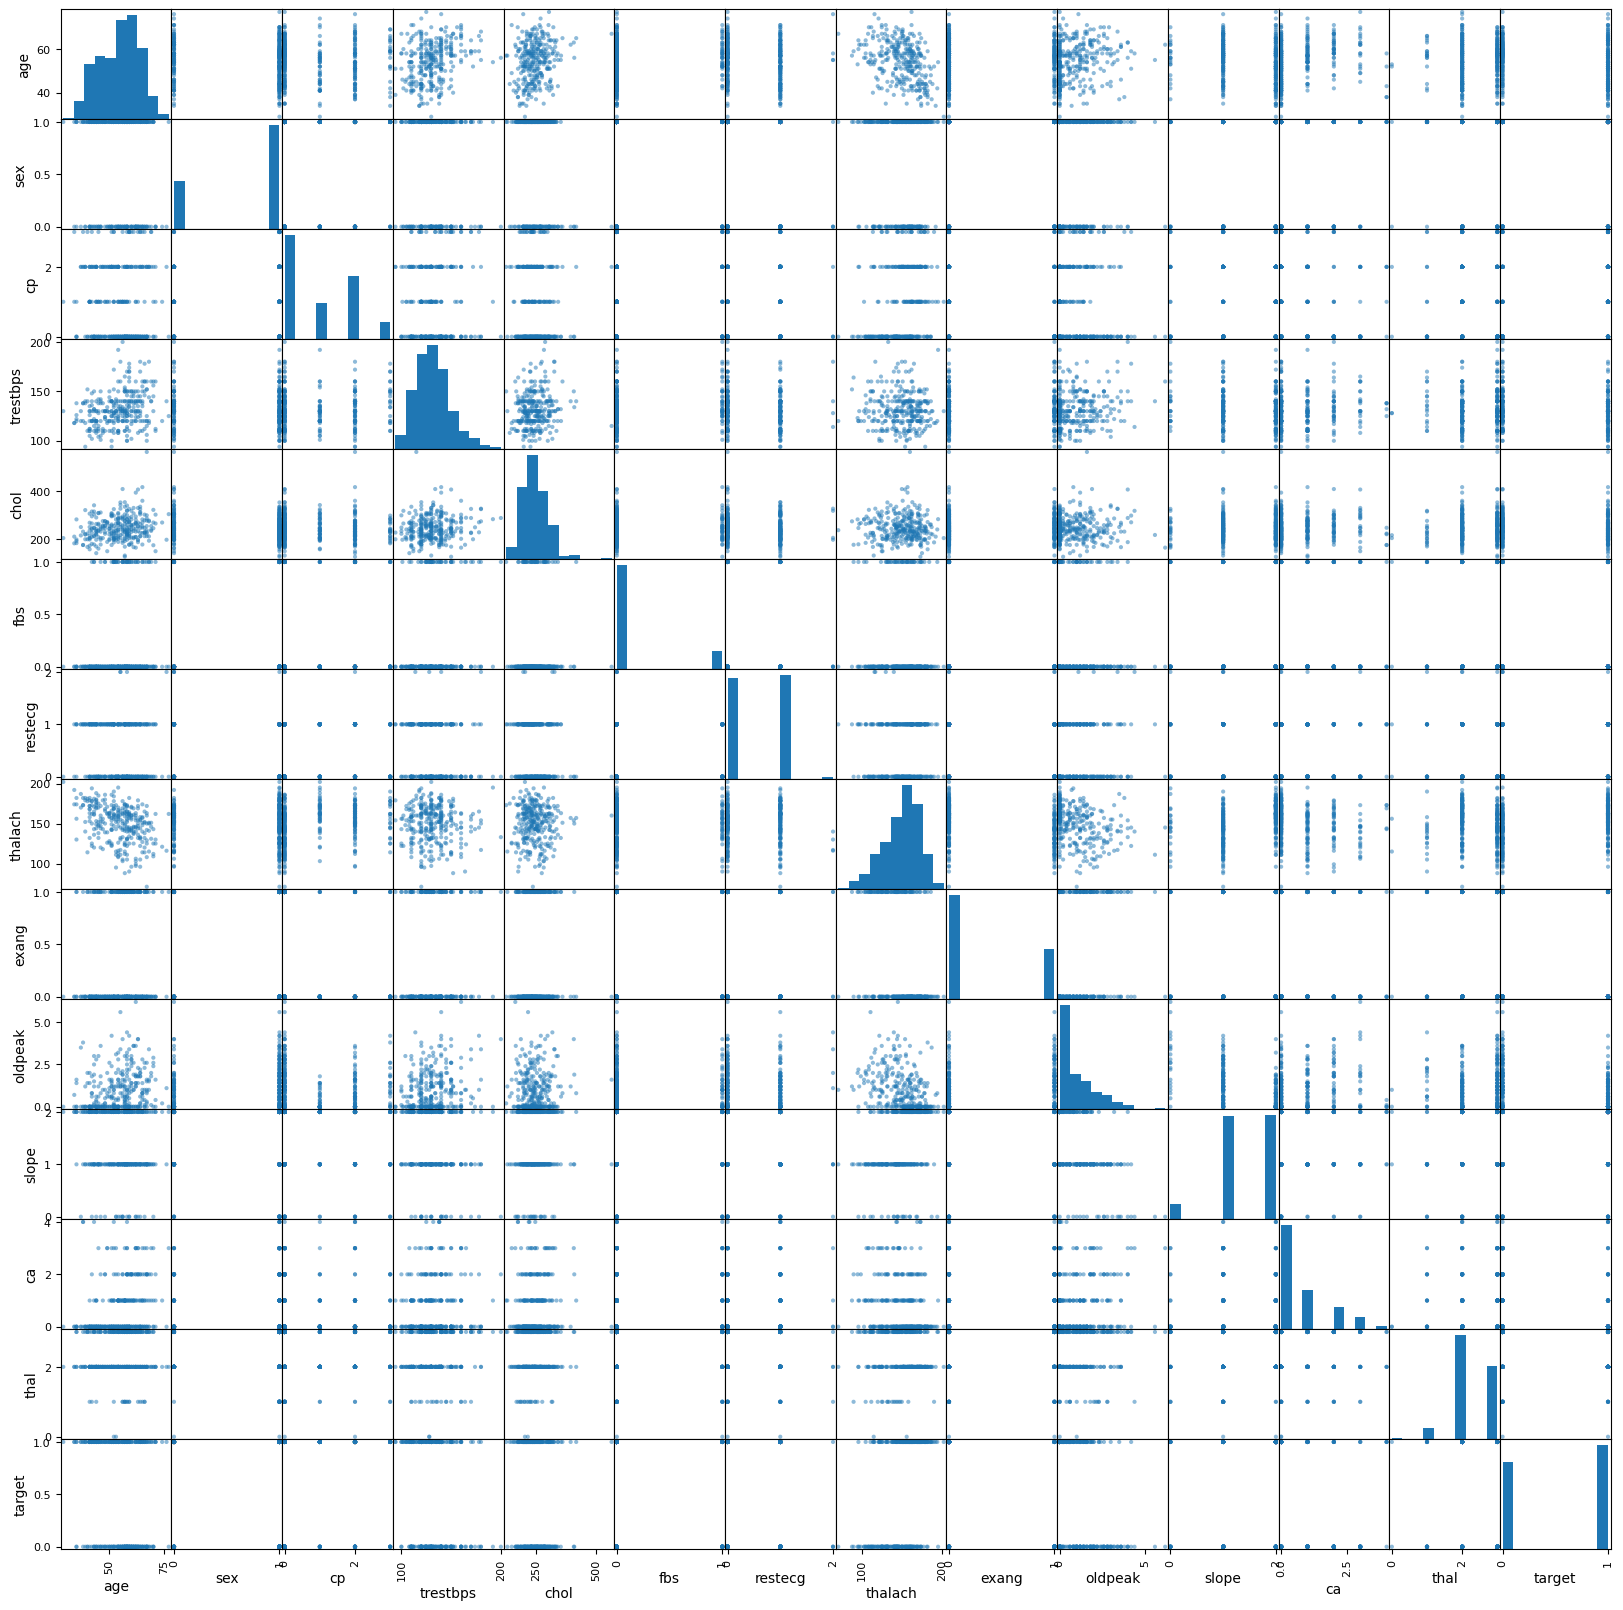

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize=(20,20))

In [7]:
from scipy import stats
z_score = stats.zscore(dataset['trestbps'])
z_score = stats.zscore(dataset['chol'])
z_score = stats.zscore(dataset['thalach'])
z_score = stats.zscore(dataset['oldpeak'])
z_score = stats.zscore(dataset['ca'])
z_score = stats.zscore(dataset['thal'])
outliers = [(z_score > 3) | (z_score < 3)]

In [8]:
X = dataset.drop('target', axis=1)
Y = dataset['target']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state = 0)

In [10]:
print(X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
137   62    1   1       128   208    1        0      140      0      0.0   
106   69    1   3       160   234    1        0      131      0      0.1   
284   61    1   0       140   207    0        0      138      1      1.9   
44    39    1   2       140   321    0        0      182      0      0.0   
139   64    1   0       128   263    0        1      105      1      0.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
251   43    1   0       132   247    1        0      143      1      0.1   
192   54    1   0       120   188    0        1      113      0      1.4   
117   56    1   3       120   193    0        0      162      0      1.9   
47    47    1   2       138   257    0        0      156      0      0.0   
172   58    1   1       120   284    0        0      160      0      1.8   

     slope  ca  thal  
137      2   0     2  
106      1   1     2  
284      2   1    

In [11]:
print(Y_test)

225    0
152    1
228    0
201    0
52     1
      ..
253    0
293    0
76     1
272    0
238    0
Name: target, Length: 91, dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [13]:
print(X_train)

[[ 0.835114    0.73989544  0.0315114  ...  0.955317   -0.69264875
  -0.42921768]
 [ 1.61651954  0.73989544  1.94020175 ... -0.67796691  0.29286491
  -0.42921768]
 [ 0.72348464  0.73989544 -0.92283378 ...  0.955317    0.29286491
   1.13964695]
 ...
 [ 0.16533783  0.73989544  1.94020175 ... -0.67796691 -0.69264875
   1.13964695]
 [-0.83932643  0.73989544  0.98585657 ...  0.955317   -0.69264875
  -0.42921768]
 [ 0.38859655  0.73989544  0.0315114  ... -0.67796691 -0.69264875
  -0.42921768]]


In [14]:
print(Y_train)

137    1
106    1
284    0
44     1
139    1
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 212, dtype: int64


In [15]:
print(Y.shape)

(303,)


In [28]:
from sklearn.naive_bayes import GaussianNB
model = RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
report = classification_report(Y_test, predictions)

In [30]:
print(f"Accuracy : , {accuracy:.2f}")
print("\nClassification_report: \n", report)

Accuracy : , 0.84

Classification_report: 
               precision    recall  f1-score   support

           0       0.87      0.77      0.82        44
           1       0.81      0.89      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [31]:
cm = confusion_matrix(predictions, Y_test)
print(cm)

[[34  5]
 [10 42]]


<Axes: >

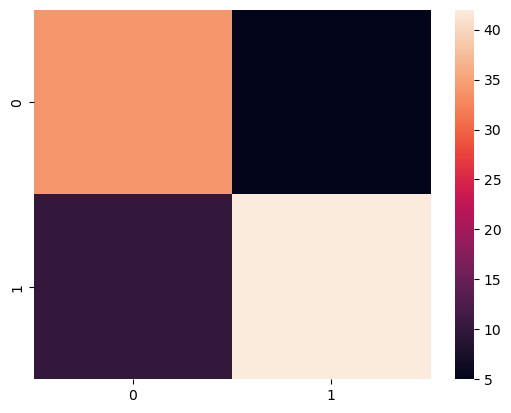

In [32]:
import seaborn as sns
sns.heatmap(cm)

In [33]:
correlation_matrix = dataset.corr()

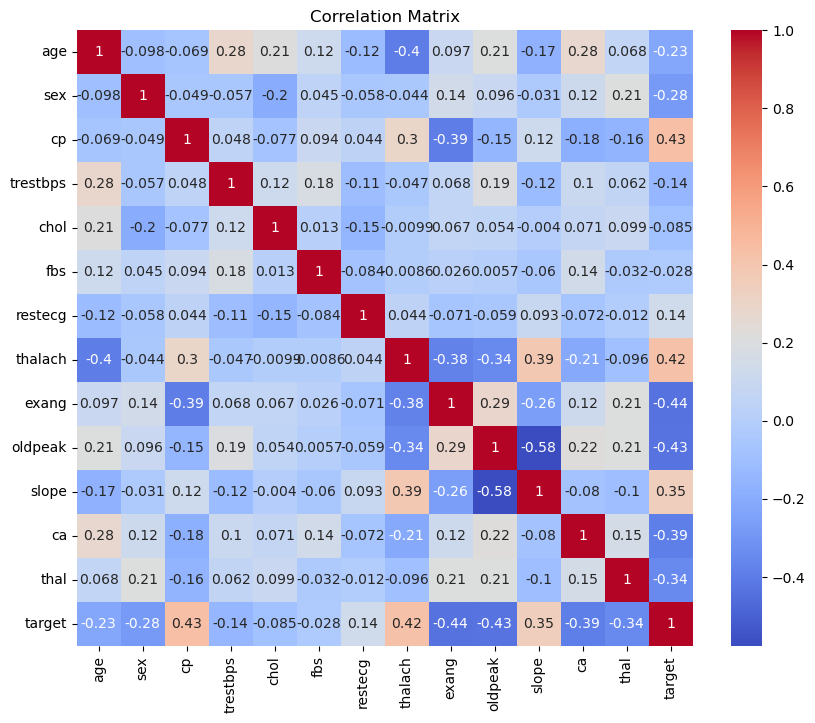

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
a = int(input("Enter age: "))
b = int(input("Enter sex: "))
c = int(input("Enter cp: "))
d = int(input("Enter trestbps: "))
e = int(input("Enter chol: "))
f = int(float(input("Enter fbs: ")))
g = int(float(input("Enter restecg: ")))
h = int(input("Enter your thalach: "))
i = int(input("Enter your exang: "))
j = float(input("Enter your oldpeak: "))
k = int(input("Enter your slope: "))
l = int(input("Enter your ca: "))
m = int(input("Enter your thal: "))

print("The result will be either in [0] or [1]\nWhere [0] --> Negative\n[1]--> Positive\nThe result is: ",
      model.predict([[a,b,c,d,e,f,g,h,i,j,k,l,m,]]))